In [112]:
#importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [113]:
#reading the dataset
df = pd.read_csv("BankNotes_Test.csv")
df

,Variance,Skewness,Curtosis,Entropy,Class
0,1.352,5.367,-1.630,-0.440,1
1,3.450,5.340,-3.340,-2.870,0
2,4.456,-3.010,1.254,1.010,1
3,2.540,4.870,-2.345,-2.400,0
4,1.920,-3.570,3.560,-1.320,0
5,2.230,5.630,-1.345,-2.345,0
6,-4.567,2.456,-0.763,-1.140,0
7,-2.434,-1.520,2.356,1.023,1
8,1.023,-1.034,-2.345,0.034,0
9,0.567,1.340,-2.034,-0.786,1


In [114]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [115]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.078818,1.407455,-0.855909,-0.636364,0.454545
std,2.565417,3.522864,2.254384,1.611003,0.522233
min,-4.567000,-3.570000,-3.340000,-2.870000,0.000000
25%,0.795000,-1.277000,-2.345000,-1.832500,0.000000
50%,1.352000,1.340000,-1.630000,-0.786000,0.000000
75%,2.385000,5.105000,0.245500,0.522000,1.000000
max,4.456000,5.630000,3.560000,2.234000,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  11 non-null     float64
 1   Skewness  11 non-null     float64
 2   Curtosis  11 non-null     float64
 3   Entropy   11 non-null     float64
 4   Class     11 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 568.0 bytes


In [117]:
#checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64


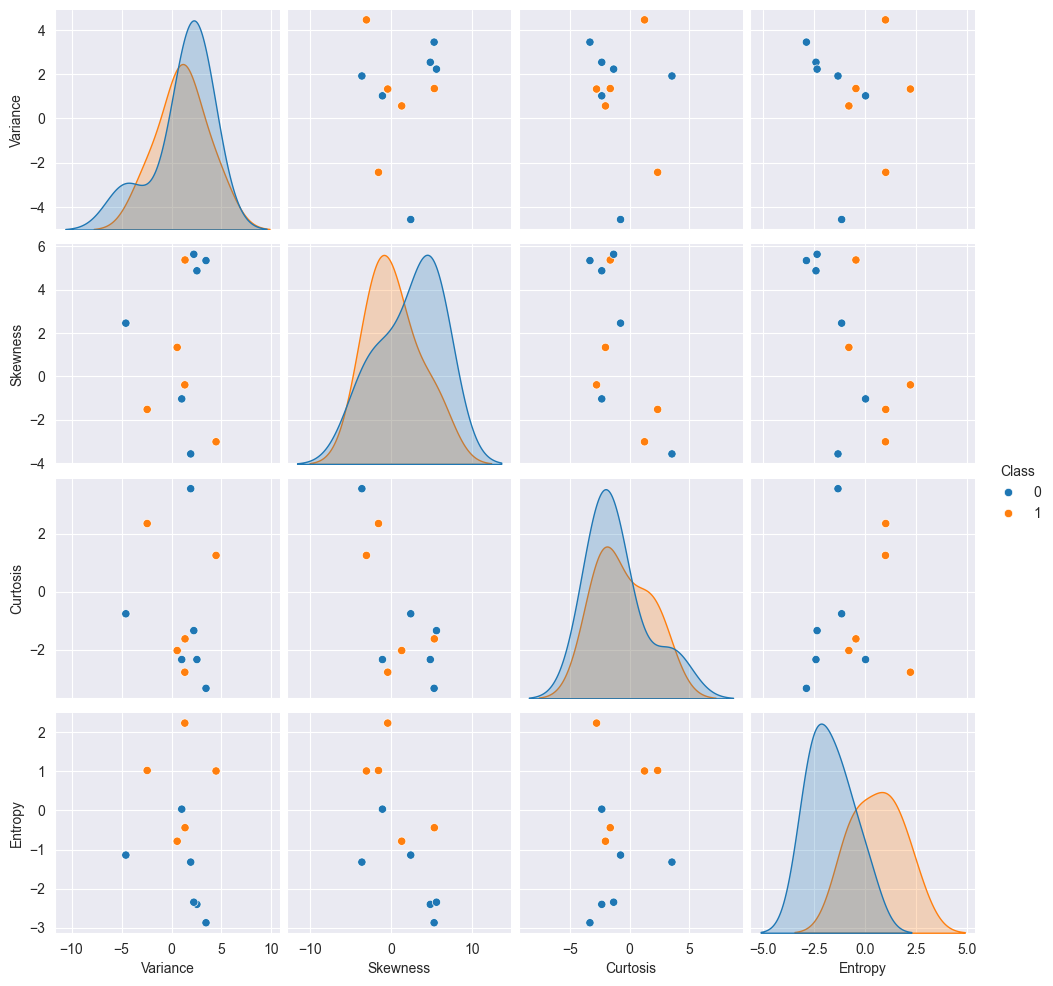

In [118]:
import seaborn as sns

# Pairplot to visualize relationships between features and target
sns.pairplot(df, hue=df.columns[-1])  # Assuming the last column is the target

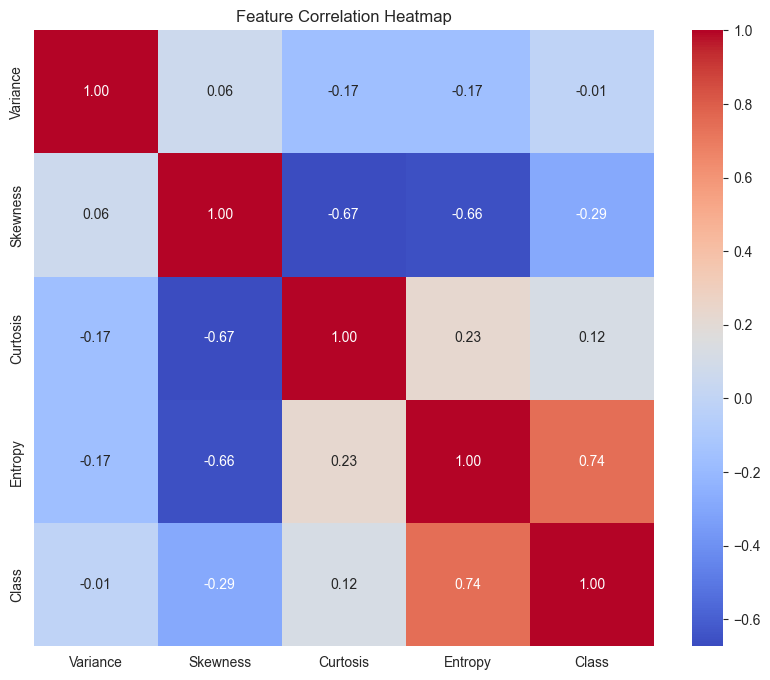

In [119]:
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

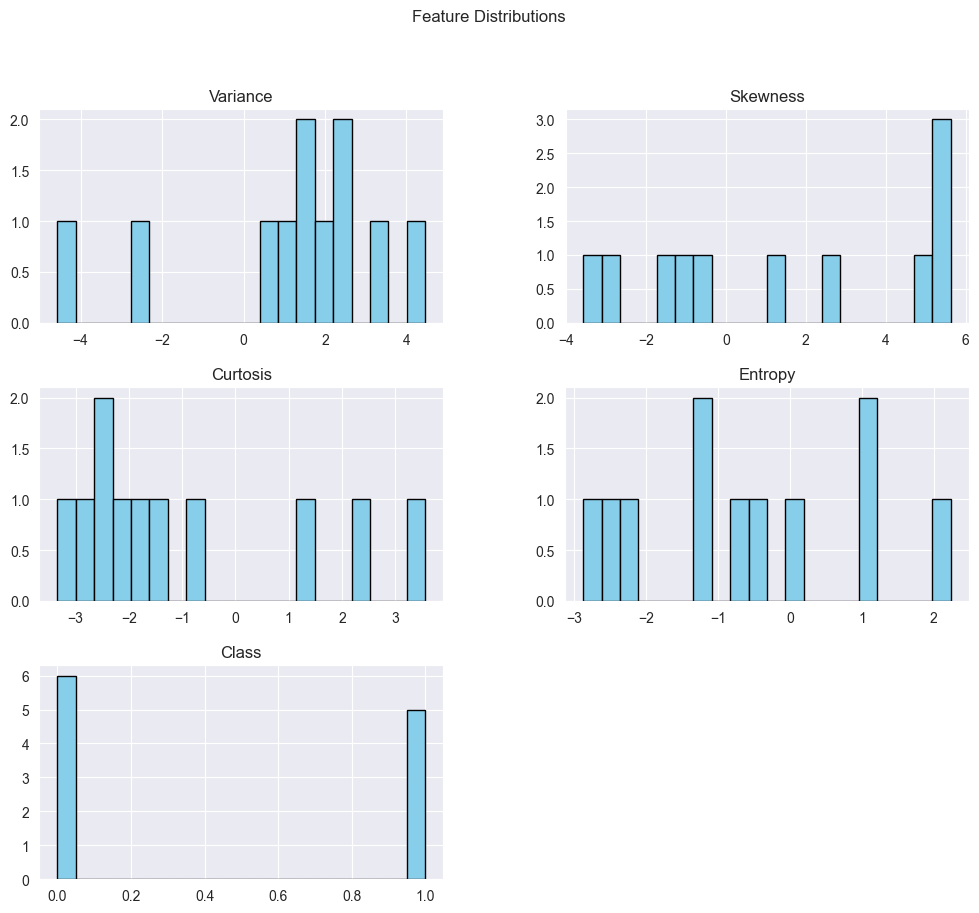

In [120]:
# Histogram for each feature
df.hist(bins=20, figsize=(12, 10), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

In [121]:
#selecting features and target variable
X = df.iloc[:, :-1]
Y = df.iloc[:, 4]

In [122]:
X

,Variance,Skewness,Curtosis,Entropy
0,1.352,5.367,-1.630,-0.440
1,3.450,5.340,-3.340,-2.870
2,4.456,-3.010,1.254,1.010
3,2.540,4.870,-2.345,-2.400
4,1.920,-3.570,3.560,-1.320
5,2.230,5.630,-1.345,-2.345
6,-4.567,2.456,-0.763,-1.140
7,-2.434,-1.520,2.356,1.023
8,1.023,-1.034,-2.345,0.034
9,0.567,1.340,-2.034,-0.786


In [123]:
Y

0     1
1     0
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    1
Name: Class, dtype: int64

In [124]:
X.describe()

,Variance,Skewness,Curtosis,Entropy
count,11.000000,11.000000,11.000000,11.000000
mean,1.078818,1.407455,-0.855909,-0.636364
std,2.565417,3.522864,2.254384,1.611003
min,-4.567000,-3.570000,-3.340000,-2.870000
25%,0.795000,-1.277000,-2.345000,-1.832500
50%,1.352000,1.340000,-1.630000,-0.786000
75%,2.385000,5.105000,0.245500,0.522000
max,4.456000,5.630000,3.560000,2.234000


In [125]:
Y.describe()

count    11.000000
mean      0.454545
std       0.522233
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Class, dtype: float64

In [126]:
#scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
# Create an imbalanced dataset
X, Y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1], n_informative=3, n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

/Users/umeshbanoth/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [128]:
X_resampled

array([[ 1.02151869, -0.54816636, -2.07961015,  2.98879898, -2.28263692],
       [ 0.21029665,  0.37881053, -1.55811557,  1.73774953, -2.08380623],
       [ 0.31221893,  0.26667276, -0.87350676,  2.42279915, -2.37323882],
       ...,
       [ 0.22373647, -0.60014518,  2.31338694,  1.66383692, -0.49050788],
       [-0.52784112,  0.51065997,  2.77060351,  2.55699737, -2.46979608],
       [-0.49146305,  0.48422615,  1.58561883,  1.73171597, -2.00208085]])

In [129]:
Y_resampled

array([0, 0, 0, ..., 1, 1, 1])

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42, stratify=Y_resampled)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1260, 5)
(540, 5)
(1260,)
(540,)


In [132]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print(model.intercept_)
print(model.coef_)

[0.14664611]
[[-1.49073323  0.03614428  3.94836443 -0.87724494  0.02730293]]


In [133]:
score = model.score(X_test, Y_test)
score

0.9981481481481481

In [134]:
score = model.score(X_train, Y_train)
score

1.0

In [135]:
Y_pred_train = model.predict(X_train)

accuracy = accuracy_score(Y_train, Y_pred_train)
recall = recall_score(Y_train, Y_pred_train)
precision = precision_score(Y_train, Y_pred_train)
f1 = f1_score(Y_train, Y_pred_train)

print("Training Performance.....")
print(f"Accuracy: {accuracy:0.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
print("....................")

Training Performance.....
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
F1-score: 1.000
....................


In [136]:
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Test Performance.....")
print(f"Accuracy: {accuracy:0.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
print("....................")

Test Performance.....
Accuracy: 0.998
Recall: 1.000
Precision: 0.996
F1-score: 0.998
....................


In [137]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,1.352,5.367,-1.630,-0.440,1
1,3.450,5.340,-3.340,-2.870,0
2,4.456,-3.010,1.254,1.010,1
3,2.540,4.870,-2.345,-2.400,0
4,1.920,-3.570,3.560,-1.320,0
5,2.230,5.630,-1.345,-2.345,0
6,-4.567,2.456,-0.763,-1.140,0
7,-2.434,-1.520,2.356,1.023,1
8,1.023,-1.034,-2.345,0.034,0
9,0.567,1.340,-2.034,-0.786,1


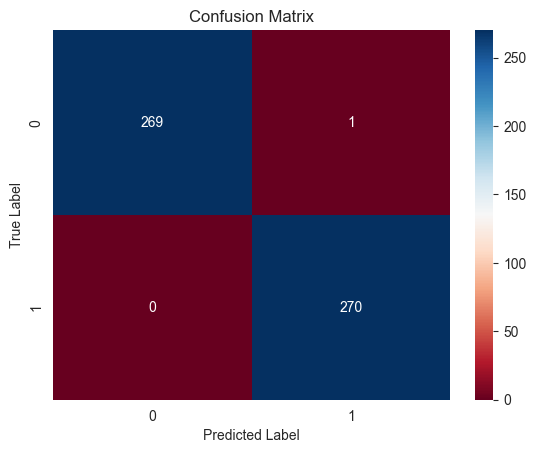

In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Using seaborn for visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
